#Segunda ronda de ejercicios

In [1]:
#Librerías a utilizar 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from datetime import datetime

## Ejercicio 1.12

Una amiga te busca con un problema de aprendizaje. Ella dice que la función objetivo $f$ es completamente desconocida, pero ella tiene $4000$ datos. Ella está dispuesta a pagarte por resolver su problema y producir para ella una función $g$ que aproxime $f$. ¿Qué es lo mejor que puedes prometerle entre las siguientes?



1.   Después del aprendizaje le darás una función $g$ que garantizas que aproxima $f$ bien fuera de la muestra.
2.   Después del aprendizaje le darás una función $g$ y con una alta probabilidad la función $g$ que le diste aproximará $f$ bien fuera de la muestra.
3.   Una de dos cosas pasarán.
      1.   Le darás una hipótesis $g$.
      2.   Le dirás que fallaste.
      
    Si le das una hipótesis $g$, entonces con una alta probabilidad la función $g$ que le diste aproximará $f$ bien fuera de la muestra.


**Solución**

La respuesta correcta es la 3. Si la función objetivo $f$ que trae nuestra amiga es compleja (más de lo esperado), será difícil para nuestros algoritmos de aprendizaje encontrar un valor adecuado para $E_{in}(g)$ lo cual en el peor de los casos podría llevarnos a no poder aprender $f$ pero en todo caso se lo podríamos hacer saber. Si logramos obtener una buena función $g$ que aproxime a $f$ entonces con el argumento de la desigualdad de Hoeffding podríamos decirle que con una alta probabilidad la función $g$ aproxima a $f$.

##Problema 1.2

Considere el perceptrón en dos dimensiones: $h(\mathbf{x})=$ $\operatorname{sign}\left(\mathbf{w}^{\mathrm{T}} \mathbf{x}\right)$ donde $\mathbf{w}=\left[w_{0}, w_{1}, w_{2}\right]^{\mathrm{T}}$ and $\mathbf{x}=\left[1, x_{1}, x_{2}\right]^{\mathrm{T}}$. Técnicamente, $\mathbf{x}$ tiene 3 coordenadas, pero nosotros llamamos esto perceptrón de dos dimensiones porque la primera coordenada está fijada en 1.
1.   Muestre que las regiones en el plano donde $h(\mathbf{x})=+1$ y $h(\mathbf{x})=-1$ están separadas por una línea. Si nosotros expresamos esta línea con la ecuación $x_{2}=a x_{1}+b$, ¿Cuál es la pendiente $a$ y el intercepto $b$ in términos de $w_{0}, w_{1}, w_{2} ?$

**Solución**

Note que

$$
\begin{aligned}
h(\mathbf{x})&=\operatorname{sign}\left(\mathbf{w}^{\mathrm{T}} \mathbf{x}\right) \\
&= \operatorname{sign}(w_0+w_1x_1+w_2x_2)
\end{aligned}
$$

Notamos que los puntos para los cuales $w_0+w_1x_1+w_2x_2=0$ corresponden a una línea en $\mathbb{R}^2$, además, $h(x)=1$ implica que $w_0+w_1x_1+w_2x_2>0$ o lo que es lo mismo, que el punto $x$ está por encima de dicha línea y de manera análoga $h(x)=-1$ implica que el punto $x$ está por debajo de la línea.

$$
\begin{aligned}
w_0+w_1x_1+w_2x_2 &= 0 \\
w_2x_2 &= -w_1x_1 - w_0 \\
x_2 &= -\frac{w_1}{w_2}x_1-\frac{w_0}{w_2}
\end{aligned}
$$

Por lo cual la pendiente está dada por $a=-\frac{w_1}{w_2}$ y el intercepto por $b=-\frac{w_0}{w_2}$

2.   Haga un dibujo para los casos $\mathbf{w}=[1,2,3]^{\mathrm{T}}$ y $\mathbf{w}=-[1,2,3]^{\mathrm{T}}$.

En más de dos dimensiones, las regiones $+1$ y $-1$ están separadas por un hiperplano, la generalización de una línea.

**Solución**

Para $w_1=[1,2,3]^{\mathrm{T}}$ tenemos la recta $x_2 = -\frac{2}{3}x_1-\frac{1}{3}$ graficada continación:

In [2]:
iFrame = '<iframe src="https://www.desmos.com/calculator/5mdomefww3?embed" width="500" height="500" style="border: 1px solid #ccc" frameborder=0></iframe>'
display.HTML(iFrame)

Y para $w_2=-[1,2,3]^{\mathrm{T}}$ tenemos la recta $x_2 = \frac{2}{3}x_1+\frac{1}{3}$ graficada a continuación:

In [3]:
iFrame = '<iframe src="https://www.desmos.com/calculator/lcwde0xz3b?embed" width="500" height="500" style="border: 1px solid #ccc" frameborder=0></iframe>'
display.HTML(iFrame)

## Problema 1.4

En el ejercicio $1.4$, utilizamos un conjunto de datos artificial para estudiar el algoritmo de aprendizaje del perceptrón. Este problema te lleva a explorar el algoritmo más allá con conjuntos de datos de diferentes tamaños y dimensiones.
1.   Genere un conjunto de datos linealmente separable de tamaño 20 como se indica en el ejercicio $1.4$. Grafique las muestras $\left\{\left(\mathbf{x}_{n}, y_{n}\right)\right\}$ así como su función objetivo $f$ en un plano. Asegúrese de marcar las muestras de diferentes clases de manera diferente y de añadir etiquetas a los ejes del gráfico.

**Solución**

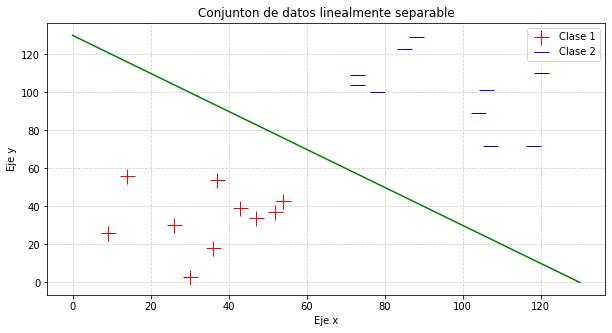

In [4]:
def generate_data(n_samples, n_features):
  class_a = list()
  class_b = list()
  for i in range(int(n_samples/2)):
    sample_a = [np.random.randint(0,61) for i in range(n_features)]
    class_a.append(sample_a)
    sample_b = [np.random.randint(70,131) for i in range(n_features)]
    class_b.append(sample_b)

  class_a = np.array(class_a)
  class_b = np.array(class_b)
  D = np.concatenate((class_a,class_b))
  D = np.append(np.ones((D.shape[0],1)), D, axis=1)
  y_class_a = np.transpose(np.ones(np.shape(class_a)[0]))
  y_class_b = -np.transpose(np.ones(np.shape(class_b)[0]))
  y = np.concatenate((y_class_a, y_class_b))

  return D, y, class_a, class_b

D, y, class_a, class_b = generate_data(20,2)

fig = plt.figure(figsize = (10, 5)) 

plt.plot(class_a[:,0],class_a[:,1], "+", color = "red", ms = 15, label="Clase 1")
plt.plot(class_b[:,0],class_b[:,1], "_", color = "blue", ms = 15, label="Clase 2")

x1, y1 = [0, 130], [130, 0]
plt.plot(x1, y1, color="green")

plt.title('Conjunton de datos linealmente separable')
plt.grid(alpha =.6, linestyle ='--')
plt.xlabel('Eje x') 
plt.ylabel('Eje y')
plt.legend()
plt.show()

2.   Corra el algoritmo de aprendizaje del perceptrón en el conjunto de datos del punto anterior. Reporte el número de actualizaciones que le tomó al algoritmo converjer. Grafique las muestras $\left\{\left(\mathbf{x}_{n}, y_{n}\right)\right\}$, la función objetivo $f$ y la hipótesis final $g$ en la misma figura. Comente si $f$ está cercana a $g$.


In [5]:
def initialize_wieghts(d):
  return np.zeros(d)
def update_weights(current_weights, current_x, current_y):
  return current_weights + current_x * current_y
def classify_data(current_weights, D):
  data_classified = list()
  for row in D:
    if np.dot(row, current_weights) > 0:
      data_classified.append(1)
    else:
      data_classified.append(-1)
  return np.array(data_classified)
def get_misclassified_sample(D, classified_data, y):
  for i in range(len(classified_data)):
    y_predicted = classified_data[i]
    y_true = y[i]
    if y_predicted != y_true:
      return D[i], y[i]

def get_misclassified_sample_randomly(D, classified_data, y):
  misclassified_indices = list()
  for i in range(len(classified_data)):
    y_predicted = classified_data[i]
    y_true = y[i]
    if y_predicted != y_true:
      misclassified_indices.append(i)

  final_index = np.random.choice(misclassified_indices)
  return D[final_index], y[final_index]

In [6]:
def execute_perceptron(D,y, random = False):
  N,d = np.shape(D)
  current_weights = initialize_wieghts(d)

  start_time = datetime.now()
  iterations = 1
  
  while True:
    print("Iteration #", iterations)
    display.clear_output(wait=True)

    classified_data = classify_data(current_weights, D)
    try:
      if random:
        current_x, current_y = get_misclassified_sample_randomly(D, classified_data, y)
      else:
        current_x, current_y = get_misclassified_sample(D, classified_data, y)
      current_weights = update_weights(current_weights, current_x, current_y)
    except:
      final_weights = current_weights
      break
    
    iterations += 1
  end_time = datetime.now()
  total_seconds = (end_time - start_time).total_seconds()

  return iterations, total_seconds, final_weights

iterations_e1, total_seconds_e1, final_weights_e1 = execute_perceptron(D,y)

print("Algoritmo terminado exitosamente")
print("Número de iteraciones totales:", iterations_e1)
print("Tiempo total en segundos:", total_seconds_e1)
print("Vector de pesos final:", final_weights_e1)

Algoritmo terminado exitosamente
Número de iteraciones totales: 3045
Tiempo total en segundos: 15.045958
Vector de pesos final: [1570.    2.  -28.]


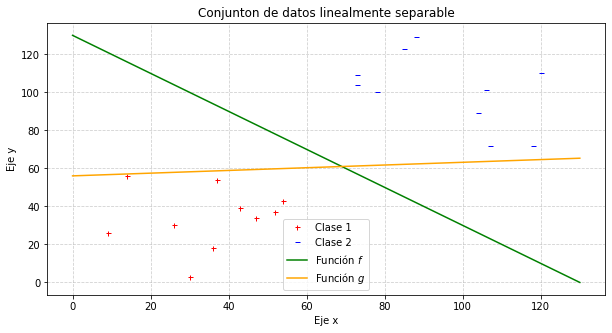

In [7]:
fig = plt.figure(figsize = (10, 5)) 

plt.plot(class_a[:,0],class_a[:,1], "+", color = "red", ms = 5, label="Clase 1")
plt.plot(class_b[:,0],class_b[:,1], "_", color = "blue", ms = 5, label="Clase 2")

x1, y1 = [0, 130], [130, 0]
plt.plot(x1, y1, color="green", label = 'Función $f$')

def get_x2(x1, w):
  return (- x1 * w[1] - w[0]) / w[2]

x2,y2 = [0, 130], [get_x2(0, final_weights_e1), get_x2(130, final_weights_e1)]
plt.plot(x2, y2, color="orange", label = 'Función $g$')

plt.title('Conjunton de datos linealmente separable')
plt.grid(alpha =.6, linestyle ='--')
plt.xlabel('Eje x') 
plt.ylabel('Eje y')
plt.legend()
plt.show()

Podemos notar que $g$ aproxima bien a $f$ y aunque no es igual, clasifica todos los puntos de manera correcta.

3.   Repita todo en **2.** con otro conjunto de datos generado aleatoriamente de tamaño $20$. Compare sus resultados con **2**. 

In [8]:
D, y, class_a, class_b = generate_data(20, 2)

iterations_e2, total_seconds_e2, final_weights_e2 = execute_perceptron(D,y)

print("Algoritmo terminado exitosamente")
print("Número de iteraciones totales en este experimento:", iterations_e2)
print("Número de iteraciones totales en el primer experimento:", iterations_e1)
print("Tiempo total en segundos de este experimento:", total_seconds_e2)
print("Tiempo total en segundos en el primer experimento:", total_seconds_e1)
print("Vector de pesos final:", final_weights_e2)

Algoritmo terminado exitosamente
Número de iteraciones totales en este experimento: 3895
Número de iteraciones totales en el primer experimento: 3045
Tiempo total en segundos de este experimento: 19.097228
Tiempo total en segundos en el primer experimento: 15.045958
Vector de pesos final: [1640.  -26.  -10.]


4.   Repita todo en **2.** con otro conjunto de datos generado aleatoriamente de tamaño $100$. Compare sus resultados con **2**.

In [9]:
D, y, class_a, class_b = generate_data(100, 2)

iterations_e3, total_seconds_e3, final_weights_e3 = execute_perceptron(D,y)

print("Algoritmo terminado exitosamente")
print("Número de iteraciones totales en este experimento:", iterations_e3)
print("Número de iteraciones totales en el primer experimento:", iterations_e1)
print("Tiempo total en segundos de este experimento:", total_seconds_e3)
print("Tiempo total en segundos en el primer experimento:", total_seconds_e1)
print("Vector de pesos final:", final_weights_e3)

Algoritmo terminado exitosamente
Número de iteraciones totales en este experimento: 4346
Número de iteraciones totales en el primer experimento: 3045
Tiempo total en segundos de este experimento: 23.638456
Tiempo total en segundos en el primer experimento: 15.045958
Vector de pesos final: [ 1.869e+03 -2.900e+01  1.000e+00]


5.   Repita todo en **2.** con otro conjunto de datos generado aleatoriamente de tamaño $1000$. Compare sus resultados con **2**.

In [10]:
D, y, class_a, class_b = generate_data(1000, 2)

iterations_e4, total_seconds_e4, final_weights_e4 = execute_perceptron(D,y)

print("Algoritmo terminado exitosamente")
print("Número de iteraciones totales en este experimento:", iterations_e4)
print("Número de iteraciones totales en el primer experimento:", iterations_e1)
print("Tiempo total en segundos de este experimento:", total_seconds_e4)
print("Tiempo total en segundos en el primer experimento:", total_seconds_e1)
print("Vector de pesos final:", final_weights_e4)

Algoritmo terminado exitosamente
Número de iteraciones totales en este experimento: 371
Número de iteraciones totales en el primer experimento: 3045
Tiempo total en segundos de este experimento: 4.639218
Tiempo total en segundos en el primer experimento: 15.045958
Vector de pesos final: [194.  -2.  -1.]


5.   Modifique el algoritmo tal que toma $\mathbf{x}_{n} \in \mathbb{R}^{10}$ en vez de $\mathbb{R}^{2}$. De manera aleatoria genere un conjunto de datos linealmente separable de tamaño 1,000 con $\mathbf{x}_{n} \in \mathbb{R}^{10}$ y corra el algoritmo con estos datos. ¿Cuántas iteraciones le toma al algoritmo converjer?

In [11]:
D, y, class_a, class_b = generate_data(1000, 10)

iterations_e5, total_seconds_e5, final_weights_e5 = execute_perceptron(D,y)

print("Algoritmo terminado exitosamente")
print("Tiempo total en segundos de este experimento:", total_seconds_e5)
print("Número de iteraciones totales en este experimento:", iterations_e5)

Algoritmo terminado exitosamente
Tiempo total en segundos de este experimento: 718.346774
Número de iteraciones totales en este experimento: 50479


6.   Repita el algoritmo en el mismo conjunto de datos que en **5.** para $100$ experimentos.  En las iteraciones de cada experimento, elija $\mathbf{x}(t)$ de manera aleatoria en vez de determinística. Grafique un histograma para el número de actualizaciones que le toma al algoritmo converjer. 

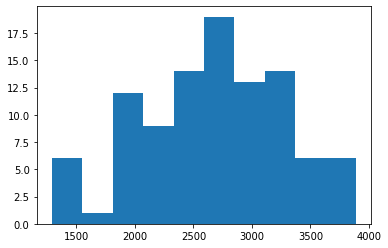

In [12]:
D, y, class_a, class_b = generate_data(20, 3)

iterations_history = list()

experiment = 1
for i in range(100):
  iterations_e6, total_seconds_e6, final_weights_e6 = execute_perceptron(D,y,True)
  iterations_history.append(iterations_e6)
  experiment += 1

plt.hist(iterations_history)
plt.show()

7.   Resuma sus conclusiones con respecto a la precisión y tiempo de cómputo como funciones de $N$ y $d$.

Por razones de capacidad computacional el experimento se ejecutó con un conjunto de datos de tamaño $20 \times 3$. Vemos que mientras $N$ o $d$ aumentan, toma más tiempo encontrar una solución.

## Problema 1.6

Considere una muestra de $10$ canicas sacadas de manera independiente de un recipiente que tiene canicas rojas y verdes. La probabilidad de sacar una canica roja es $\mu$. Para $\mu = 0.05$ $\mu = 0.5$ y $\mu=0.8$ calcule la probabilidad de no obtener canicas rojas ($\nu=0$) en los siguientes casos:

1.   Sacamos una sola muestra. Calcule la probabilidad de que $\nu=0$.

**Solución.**

$$
\begin{aligned}
P(\nu = 0) &= (1-\mu)^{10} \quad &\text{En general} \\
P(\nu = 0) &=  0.5987369392383787 \quad &\text{Para } \mu=0.05 \\
P(\nu = 0) &=  0.0009765625 \quad &\text{Para } \mu=0.5 \\
P(\nu = 0) &=  0.00000010239 \quad &\text{Para } \mu=0.8 \\
\end{aligned}
$$

2.   Sacamos $1000$ muestras independientes. Calcule la probabilidad de que al menos una de las muestras tiene $\nu=0$.

**Solución**

Calculemos la probabilidad del evento complementario, es decir la probabilidad de que todas las muestras tengan $\nu>0$. La probabilidad de que una de las muestras tenga $\nu>0$ es de acuerdo al punto anterior $1-(1-\mu)^{10}$ por lo cual la probabilidad que todas las muestras tengan $\nu>0$ es $(1-(1-\mu)^{10})^{1000}$ y así la probabilidad buscada es $1-(1-(1-\mu)^{10})^{1000}$


$$
\begin{aligned}
P(\text{Al menos una de las muestras tiene } \nu = 0) &= 1-(1-(1-\mu)^{10})^{1000} \quad &\text{En general} \\
P('') &=  1 \quad &\text{Para } \mu=0.05 \\
P('') &=  0.623576201943276 \quad &\text{Para } \mu=0.5 \\
P('') &=  0.00010239476257623004   \quad &\text{Para } \mu=0.8 \\
\end{aligned}
$$

3.   Repetir **2.** para $1,000,000$ muestras independientes

**Solución**

Bajo el razonamiento del punto anterior:

$$
\begin{aligned}
P &= 1-(1-(1-\mu)^{10})^{1000000} \quad &\text{En general} \\
P &=  1 \quad &\text{Para } \mu=0.05 \\
P &=  1 \quad &\text{Para } \mu=0.5 \\
P &=  0.09733159268316072   \quad &\text{Para } \mu=0.8 \\
\end{aligned}
$$

## Problema 1.12 

Este problema investiga cómo cambiar la medida del error puede cambiar el resultado del proceso de aprendizaje. Tiene $ N $ puntos de datos $ y_{1} \leq $ $ \cdots \leq y_{N} $ y desea estimar un valor 'representativo'.
1.   Si su algoritmo se trata de encontrar la hipótesis $ h $ que minimiza la suma de las desviaciones cuadradas "in-sample",
$$
E_{\mathrm{in}}(h) = \sum_{n = 1} ^ {N} \left(h-y_{n} \right) ^ {2}
$$
entonces muestre que su estimación será la media "in-sample",
$$
h_{\text {mean}} = \frac {1} {N} \sum_{n = 1} ^ {N} y_{n}
$$

**Solución**

Como el algoritmo se trata de encontrar la hipótesis $h$ que minimiza $E_{\mathrm{in}}(h)$, tomemos la derivada con respecto a $h$ e igualemos a $0$:

$$\begin{align*} \frac{\partial{E_{in}(h)}}{\partial{h}} &= \sum_{n=1}^{N}2(h-y_n) \\ h_{mean} &= \frac{1}{N} \sum_{n=1}^{N}y_n\\ \end{align*}$$


2.   Si su algoritmo se trata de encontrar la hipótesis $ h $ que minimiza la suma de las desviaciones absolutas "in-sample",
$$
E_{\mathrm {in}} (h) = \sum_ {n = 1} ^ {N} \left | h-y_{n} \right |
$$
entoces muestre que su estimación será la mediana "in-sample" $ h_{\text {med}} $, que es cualquier valor para el cual la mitad de los puntos de datos son como máximo $ h_{\text {med}} $ y la mitad de los datos los puntos son al menos $ h_{\text {med}} $.

**Solución**

De manera análoga:
$$\begin{align*} \frac{\partial{E_{in}(h)}}{\partial{h}} &= \sum_{n=1}^{N}sign(h - y_n) \\ \end{align*}$$

Note entonces que $ h_{\text {med}} $, como se define en el enunciado, hará que la derivada sea cero, minimizando así el error en la muestra.

3.   Suponga que $ y_{N} $ se perturba a $ y_{N} + \ epsilon $, donde $ \epsilon \rightarrow \infty $. Entonces, el punto de datos único $ y_{N} $ se convierte en un valor atípico. ¿Qué sucede con sus dos estimadores $ h_{\text {mean}} $ y $ h_{\text {med}}? $

**Solución**

Sabemos que la media es bastante suceptible a los datos atípicos por lo cual dicha perturbación hará que $h_{mean}$ aumente demasiado, no obstante, $h_{med}$ puede mantenerse igual ya que el número de datos por arriba de $h_{med}$ será el mismo.